# AIND - Project 2 - Build a Forward-Planning Agent
## Report

### Environment
The results were produced on a desktop computer with the following specification:
- OS: Ubuntu 20.04.2 LTS (64 bit)
- Memory: 23,4 GiB
- Processor: Intel Core i7-4790K CPU@4Ghz * 8
- GNU bash, version 5.0.17(1)-release (x86_64-pc-linux-gnu)
- Conda virutal environment: Python: 3.9.5
### Obtaining the data:
The provided `run_search.py` script was run with the following parameters:
```bash 
(project2) $ parallel python run_search.py -p 1 2 -s {1} ::: {1..11} > results.txt
```
A sidenote here: parallel is just a fancy way of running these script's, well, parallely, however it even slightly deteriorates performance on my relatively old computer.  
The `results.txt` was processed to consolidate the data in a nearly tabular format in an new file:
```bash
grep '^Solving*' -A 5 results.txt | grep -v -e '^$' > result_summary.txt
```

The `result_summary.txt` consist of records like this for each test scenario:
```text
Solving Air Cargo Problem 1 using breadth_first_search...
# Actions   Expansions   Goal Tests   New Nodes
    20          43          56         178    
Plan length: 6  Time elapsed in seconds: 0.0017708629602566361
--
```



In [161]:
!grep '^Solving*' -A 5 results | grep -v -e '^$' > result_summary.txt

In [162]:
import re
import collections
from pprint import pprint
results = []
Result = collections.namedtuple('Result',['problem', 'search', 'actions', 'exp', 'goal_tests', 'new_nodes', 'length', 'duration'])
idx = 0
with open("result_summary.txt", "r") as f:
    lines = f.readlines()

longlines = []
for l in lines:
    
    match_problem = re.compile(r"^Solving Air Cargo Problem (\d).[a-z]+ ([a-z].+)...$").match(l)
    if match_problem:
        current = match_problem.group(1)
        search = match_problem.group(2)
        continue
    m_aegn = re.compile(r"^\s+(\d+)\s+(\d+)\s+(\d+)\s+(\d+)\s+$").match(l)    
    if m_aegn:
        (action, exp, goal_tests, new_nodes) = (m_aegn.group(1), m_aegn.group(2), m_aegn.group(3), m_aegn.group(4))
        continue
    
    m_length_dur = re.compile(r"^Plan length: (\d+).+Time elapsed in seconds: (\d+.?\d+)").match(l)
    if m_length_dur:        
        final = Result(current, search, action, exp, goal_tests, new_nodes, m_length_dur.group(1), m_length_dur.group(2))
        longlines.append(final)

for ln in longlines:
    print (ln)

print(len(longlines))

Result(problem='1', search='greedy_best_first_graph_search with h_unmet_goals', actions='20', exp='7', goal_tests='9', new_nodes='29', length='6', duration='0.0010779639706015587')
Result(problem='2', search='greedy_best_first_graph_search with h_unmet_goals', actions='72', exp='17', goal_tests='19', new_nodes='170', length='9', duration='0.011405984056182206')
Result(problem='1', search='breadth_first_search', actions='20', exp='43', goal_tests='56', new_nodes='178', length='6', duration='0.004030538024380803')
Result(problem='2', search='breadth_first_search', actions='72', exp='3343', goal_tests='4609', new_nodes='30503', length='9', duration='1.1890473290113732')
Result(problem='1', search='astar_search with h_unmet_goals', actions='20', exp='50', goal_tests='52', new_nodes='206', length='6', duration='0.005937122972682118')
Result(problem='2', search='astar_search with h_unmet_goals', actions='72', exp='2467', goal_tests='2469', new_nodes='22522', length='9', duration='1.333430488

In [163]:
import pandas as pd

df = pd.DataFrame.from_records(longlines, columns=Result._fields)
df['exp'] = df['exp'].astype(int)
df['actions'] = df['actions'].astype(int)
df['goal_tests'] = df['goal_tests'].astype(int)
df['new_nodes'] = df['new_nodes'].astype(int)
df['length'] = df['length'].astype(int)
df['duration'] = df['duration'].astype(float)
df.style.set_properties(subset=["search"], **{'text-align': 'left'})


,problem,search,actions,exp,goal_tests,new_nodes,length,duration
0,1,greedy_best_first_graph_search with h_unmet_goals,20,7,9,29,6,0.001078
1,2,greedy_best_first_graph_search with h_unmet_goals,72,17,19,170,9,0.011406
2,1,breadth_first_search,20,43,56,178,6,0.004031
3,2,breadth_first_search,72,3343,4609,30503,9,1.189047
4,1,astar_search with h_unmet_goals,20,50,52,206,6,0.005937
5,2,astar_search with h_unmet_goals,72,2467,2469,22522,9,1.333430
6,1,depth_first_graph_search,20,21,22,84,20,0.002146
7,2,depth_first_graph_search,72,624,625,5602,619,1.530638
8,1,uniform_cost_search,20,60,62,240,6,0.005838
9,2,uniform_cost_search,72,5154,5156,46618,9,1.983656


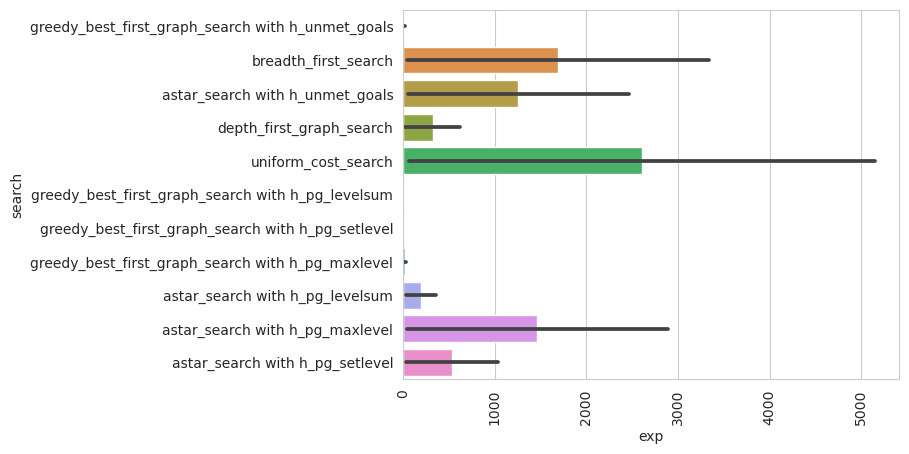

In [164]:
import seaborn as sns
sns.set_style("whitegrid")

x = df['search']
y = df['exp']
sns.barplot(x="exp", y = "search", data=df)
plt.xticks(rotation=90)
plt.show()